# Librerías

In [24]:
# Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Constantes
from scipy.constants import c, e, h

# Estilo de las gráficas
sns.set_theme()


# Funciones

In [25]:
def calcular_FWHM(ruta_archivo, nombre): 

    lambda_led_df = pd.read_csv(
        ruta_archivo, sep=',',
        skiprows=54, 
        names=[
            'lambda_nm',
              'intensidad'
        ], 
        dtype={
            'lambda_nm': np.float64,
            'intensidad': np.float64
        }, 
        index_col=False, 
        skipfooter=1, 
        engine='python'
    )
    
    intensidad_max_led = lambda_led_df.intensidad.max()
    filtro_lambda = lambda_led_df.intensidad == lambda_led_df.intensidad.max()
    lambda_led = lambda_led_df[filtro_lambda].lambda_nm.iloc[0]

    filtro_intervalo = np.isclose(lambda_led_df.intensidad, intensidad_max_led/2, atol=1e-3) 
    FWHM = lambda_led_df[filtro_intervalo].lambda_nm.diff().iloc[1]

    print(f'\n{nombre}\n\nLambda = {lambda_led} [nm]\nError Lambda = {FWHM/2} [nm]\nFWHM = {FWHM} [nm]\n{'-'*30}')

    return lambda_led, FWHM/2

def calcular_regresion_lineal(x, y):
    
    coeficientes_led, M_cov = np.polyfit(x, y, 1, cov=True)
    m, b = coeficientes_led
    error_m, error_b = np.sqrt(np.diag(M_cov))

    print(f'''Regresión lineal:
    {'-'*40}
    Pendiente (m): ({m : .4g} ± {error_m: .4g})
    Intercepto (b): ({b : .4g} ± {error_b : .4g})''')

    return m, b, error_m, error_b

# Leer archivos

In [26]:
# Cargar los datos de la resistencia
leds_df = pd.read_excel('Lab_4.xlsx', sheet_name='LEDs', usecols='A,B,C')
leds_df 

,color,voltaje_V,error_V
0,amarillo,1.98,0.01290
1,azul,2.66,0.01630
2,rojo,1.90,0.01250
3,verde,2.53,0.01565
4,naranja,1.87,0.01235


In [27]:
archivos_leds = (
    (r'Led-T-1_98V.csv', 'LED_amarillo'),
    (r'Led-T-2_66V.csv', 'LED_azul'),
    (r'Led-T-1_90V.csv', 'LED_rojo'),
    (r'Led-T-2_52V.csv', 'LED_verde'),
    (r'Led-T-1_87V.csv', 'LED_naranja')
)

lambda_leds_nm = []
error_lambda_leds_nm = []

for ruta, nombre in archivos_leds:
    lambda_led, error_lambda = calcular_FWHM(ruta, nombre)
    lambda_leds_nm.append(lambda_led)
    error_lambda_leds_nm.append(error_lambda)



LED_amarillo

Lambda = 598.0706787 [nm]
Error Lambda = 0.05908204999997224 [nm]
FWHM = 0.11816409999994448 [nm]
------------------------------

LED_azul

Lambda = 463.3314819 [nm]
Error Lambda = 8.836090100000007 [nm]
FWHM = 17.672180200000014 [nm]
------------------------------

LED_rojo

Lambda = 634.0305786 [nm]
Error Lambda = 7.818084699999986 [nm]
FWHM = 15.636169399999972 [nm]
------------------------------

LED_verde

Lambda = 527.1259766 [nm]
Error Lambda = 0.11703490000002148 [nm]
FWHM = 0.23406980000004296 [nm]
------------------------------

LED_naranja

Lambda = 611.1868286 [nm]
Error Lambda = 0.17749024999994845 [nm]
FWHM = 0.3549804999998969 [nm]
------------------------------


# Calculo de la constante de Plank 
$eV_{0} = hf \Rightarrow h = \frac{eV_{0}}{f} = \frac{eV_{0}c}{\lambda} = \frac{E}{f}$

In [28]:
leds_df['lambda_nm'] = lambda_leds_nm
leds_df['error_lambda_nm'] = error_lambda_leds_nm

leds_df['lambda_m'] = leds_df.lambda_nm * 1e-9
leds_df['error_lambda_m'] = leds_df.error_lambda_nm * 1e-9

leds_df['frecuencia_Hz'] = c / leds_df.lambda_m
leds_df['error_frecuencia_Hz'] = (c / leds_df.lambda_m ** 2) * leds_df.error_lambda_m

leds_df['energia_J'] = e * leds_df.voltaje_V
leds_df['error_energia_J'] = e * leds_df.error_V

leds_df

,color,voltaje_V,error_V,lambda_nm,error_lambda_nm,lambda_m,error_lambda_m,frecuencia_Hz,error_frecuencia_Hz,energia_J,error_energia_J
0,amarillo,1.98,0.01290,598.070679,0.059082,5.980707e-07,5.908205e-11,5.012659e+14,4.951893e+10,3.172310e-19,2.066808e-21
1,azul,2.66,0.01630,463.331482,8.836090,4.633315e-07,8.836090e-09,6.470367e+14,1.233949e+13,4.261790e-19,2.611548e-21
2,rojo,1.90,0.01250,634.030579,7.818085,6.340306e-07,7.818085e-09,4.728360e+14,5.830431e+12,3.044136e-19,2.002721e-21
3,verde,2.53,0.01565,527.125977,0.117035,5.271260e-07,1.170349e-10,5.687302e+14,1.262721e+11,4.053507e-19,2.507406e-21
4,naranja,1.87,0.01235,611.186829,0.177490,6.111868e-07,1.774902e-10,4.905087e+14,1.424450e+11,2.996070e-19,1.978688e-21


In [29]:
# Regresión lineal
x_led = leds_df.frecuencia_Hz
y_led = leds_df.energia_J

m_led, b_led, error_m_led, error_b_led = calcular_regresion_lineal(x_led, y_led)

Regresión lineal:
    ----------------------------------------
    Pendiente (m): ( 8.023e-34 ±  1.423e-34)
    Intercepto (b): (-7.953e-20 ±  7.681e-20)


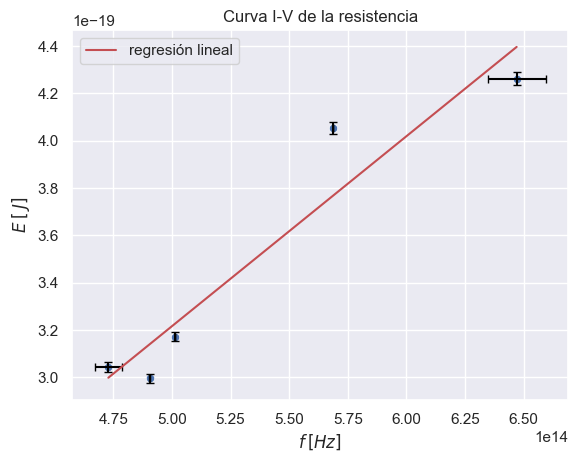

In [30]:
# Generar gráfico I vs V del diodo linealizado
plt.errorbar(x= leds_df.frecuencia_Hz, y= leds_df.energia_J, xerr= leds_df.error_frecuencia_Hz, yerr=leds_df.error_energia_J, fmt='none', ecolor="#000000", capsize=3)
sns.scatterplot(data=leds_df, x='frecuencia_Hz', y= 'energia_J')
sns.lineplot(x= x_led, y= (m_led * x_led) + b_led, color= 'r', label='regresión lineal', linestyle='-')

plt.title('Curva I-V de la resistencia')
plt.xlabel(r'$f\:[Hz]$')
plt.ylabel(r'$E\:[\:J]$')
plt.show()

In [31]:
# Constante de plank aproximada con los datos de cada LED
leds_df.energia_J/leds_df.frecuencia_Hz

0    6.328596e-34
1    6.586628e-34
2    6.438037e-34
3    7.127293e-34
4    6.108088e-34
dtype: float64

# Comparación con el valor actual aceptado para $h$

In [38]:
error_porcentual_h = ( np.abs(m_led - h) / h ) * 100
coincidencia_h = np.abs(m_led - h) / error_m_led
precision = error_m_led / m_led

print(f'''Error_%_h = {error_porcentual_h : .2g} %
Coincidencia_h = {coincidencia_h : .2g}
Precisión_h = {coincidencia_h : .2g}''')

Error_%_h =  21 %
Coincidencia_h =  0.98
Precisión_h =  0.98
